In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import koreanize_matplotlib

In [2]:
train = pd.read_csv("train.csv", encoding="utf-8")
train.shape

(891, 12)

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


<AxesSubplot:>

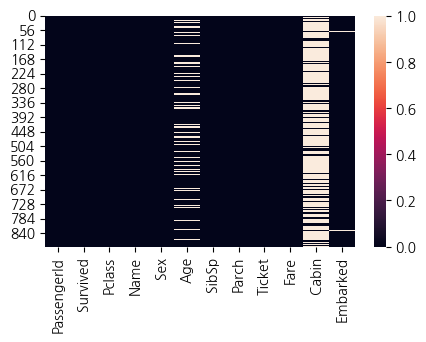

In [4]:
plt.figure(figsize=(5,3))
sns.heatmap(train.isnull())

In [5]:
train.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

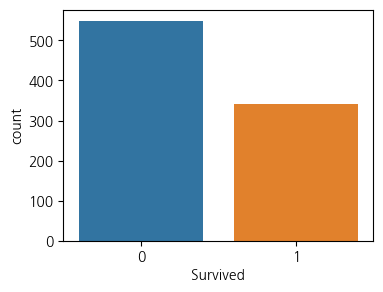

In [6]:
plt.figure(figsize=(4, 3))
sns.countplot(data=train, x="Survived")

<AxesSubplot:xlabel='Survived', ylabel='count'>

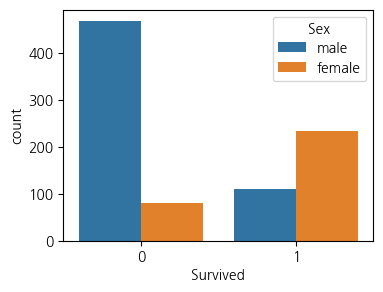

In [7]:
plt.figure(figsize=(4, 3))
sns.countplot(data=train, x="Survived", hue="Sex")

<AxesSubplot:xlabel='Survived', ylabel='count'>

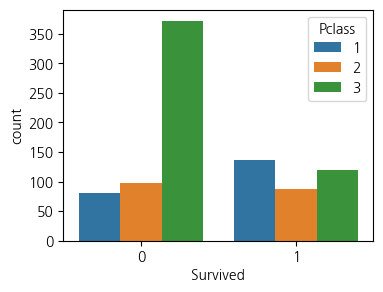

In [8]:
plt.figure(figsize=(4, 3))
sns.countplot(data=train, x="Survived", hue="Pclass")

<AxesSubplot:xlabel='Pclass', ylabel='Age'>

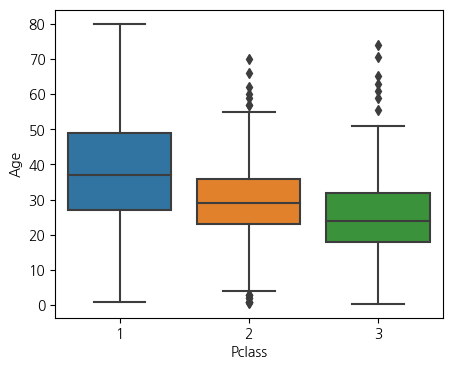

In [9]:
plt.figure(figsize=(5, 4))
sns.boxplot(data=train, x="Pclass", y="Age")

In [10]:
train.groupby(["Pclass"])["Age"].describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,186.0,38.233441,14.802856,0.92,27.0,37.0,49.0,80.0
2,173.0,29.877630,14.001077,0.67,23.0,29.0,36.0,70.0
3,355.0,25.140620,12.495398,0.42,18.0,24.0,32.0,74.0


결측치가 있는 `Age`를 `Pclass`의 평균 나이값을 이용해 대채

In [11]:
train.groupby("Pclass")["Age"].mean()

Pclass
1    38.233441
2    29.877630
3    25.140620
Name: Age, dtype: float64

In [12]:
Pclass_mean = train.groupby("Pclass")["Age"].mean().tolist()

In [13]:
def age_pclass(cols):
    train.loc[(train["Pclass"]==1) & train["Age"].isnull(), "Age"] = Pclass_mean[0]
    train.loc[(train["Pclass"]==2) & train["Age"].isnull(), "Age"] = Pclass_mean[1]
    train.loc[(train["Pclass"]==3) & train["Age"].isnull(), "Age"] = Pclass_mean[2]    

In [14]:
age_pclass("Age")

In [15]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.00000,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.00000,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.00000,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.00000,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.00000,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.00000,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.00000,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,25.14062,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.00000,0,0,111369,30.0000,C148,C


범주형 데이터 변환

범주형 데이터는 학습에서 바로 사용이 불가능하기 때문에 수치형으로 변환이 필요

Sex의 경우, Male=0, Female=1과 같이 변환

In [16]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


현재 범주형 데이터는, Name, Sex, Ticket, Embarked가 있음<br/>

__pd.get_dummies__<br/>
학습 이전에 모든 데이터를 수치로 변환해주는 전처리 작업이 필요함<br/>

수치형 데이터로 변환<br/>
수치화된 데이터를 가변수화<br/>
Note!!! - 가변수화<br/>
수치형 데이터로만 변환하면, 서로 간의 관계성이 생기게 되어버림<br/>

월, 화, 수 ... -> 1, 2, 3 ...<br/>
1+2=3 / 월+화=수라는 관계성이 성립해버림<br/>
`pandas`의 `get_dummies` 함수는 원핫인코딩을 이용하는 방식<br/>
`get_dummies(data=, prefix=, prefix_sep=, dummy_na=, columns=, drop_first=, dtype=)` 형식으로 존재함<br/>

- data: one-hot encoding을 적용할 데이터
- prefix: 생성할 더미 데이터(가변수화된 데이터)의 컬럼 prefix
- prefixsep: `default=''`
- dummpy_na: NaN도 포함시킬지, default=False
- columns: 대상 컬럼
- drop_first: k개의 범주를 k-1개로 가변수화할 경우 사용
- dtype: 새로운 columns의 데이터 타입

In [17]:
train_dum = pd.get_dummies(data=train, columns = ["Sex", "Embarked"])

In [18]:
train_dum.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Age', 'SibSp', 'Parch',
       'Ticket', 'Fare', 'Cabin', 'Sex_female', 'Sex_male', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'],
      dtype='object')

In [19]:
train_dum = train_dum.drop(columns=['Name', 'Ticket', 'Cabin', 'Sex_female', 'Embarked_C'])

In [20]:
train_dum = train_dum.rename(columns={'Sex_male':'male', 'Embarked_Q':'Q', 'Embarked_S':"S"})
train_dum.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1
